In [2]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
count=[]
name=[]
name2count={}

dirPath="/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv"

# total····················································
print("total····················································")
df=pd.read_csv(dirPath)
print("len tempDf",len(df))


# no second transaction····················································
print("no second transaction····················································")
df=pd.read_csv(dirPath)
tempDf = df[ (df["isError_1"]=="none") ]
# count.append(len(tempDf))
# name.append("Private Operation")
print("len tempDf",len(tempDf))


# have second transaction····················································
print("have second transaction····················································")
df=pd.read_csv(dirPath)
tempDf = df[ (df["isError_1"]!="none") ]
print("len tempDf",len(tempDf))

# Destructive Front-Buying····················································
print("Destructive Front-minting····················································")
df=pd.read_csv(dirPath)
df = df[ (df["isError_1"]!="none") ]
tempDf = df[ (df["startAddr"]=="0x0000000000000000000000000000000000000000") & (df["isError_0"]=="None") & (df["isError_1"]!="None") ]
count.append(len(tempDf))
name.append("Destructive Front-Minting")
print("len tempDf",len(tempDf))

tempSet1=set(tempDf["transactionHash_0"].values)
print("transactionHash_0: ",len(tempSet1))

tempSet2=set(tempDf["transactionHash_1"].values)
print("transactionHash_1: ",len(tempSet2))

print("total transaction: ",len(tempSet1)+len(tempSet2))

# Tolerating Front-Buying····················································
print("Tolerating Front-minting····················································")
df=pd.read_csv(dirPath)
df = df[ (df["isError_1"]!="none") ]
tempDf = df[ (df["startAddr"]=="0x0000000000000000000000000000000000000000") & (df["isError_0"]=="None") & (df["isError_1"]=="None") ]
count.append(len(tempDf))
name.append("Tolerating Front-Minting")
print("len tempDf",len(tempDf))

tempSet1=set(tempDf["transactionHash_0"].values)
print("transactionHash_0: ",len(tempSet1))

tempSet2=set(tempDf["transactionHash_1"].values)
print("transactionHash_1: ",len(tempSet2))

print("total transaction: ",len(tempSet1)+len(tempSet2))

# Destructive Front-Buying····················································
print("Destructive Front-Buying····················································")
df=pd.read_csv(dirPath)
df = df[ (df["isError_1"]!="none") ]
tempDf = df[ (df["startAddr"]!="0x0000000000000000000000000000000000000000") & (df["isError_0"]=="None") & (df["isError_1"]!="None") ]
count.append(len(tempDf))
name.append("Destructive Front-Buying")
print("len tempDf",len(tempDf))

tempSet1=set(tempDf["transactionHash_0"].values)
print("transactionHash_0: ",len(tempSet1))

tempSet2=set(tempDf["transactionHash_1"].values)
print("transactionHash_1: ",len(tempSet2))

print("total transaction: ",len(tempSet1)+len(tempSet2))

# Tolerating Front-Buying····················································
print("Tolerating Front-Buying····················································")
df=pd.read_csv(dirPath)
df = df[ (df["isError_1"]!="none") ]
tempDf = df[ (df["startAddr"]!="0x0000000000000000000000000000000000000000") & (df["isError_0"]=="None") & (df["isError_1"]=="None") ]
count.append(len(tempDf))
name.append("Tolerating Front-Buying")
print("len tempDf",len(tempDf))

tempSet1=set(tempDf["transactionHash_0"].values)
print("transactionHash_0: ",len(tempSet1))

tempSet2=set(tempDf["transactionHash_1"].values)
print("transactionHash_1: ",len(tempSet2))

print("total transaction: ",len(tempSet1)+len(tempSet2))

total····················································


/tmp/ipykernel_1698425/2075684247.py:9: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(dirPath)


len tempDf 41272
no second transaction····················································


/tmp/ipykernel_1698425/2075684247.py:15: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(dirPath)


len tempDf 0
have second transaction····················································


/tmp/ipykernel_1698425/2075684247.py:24: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(dirPath)


len tempDf 41272
Destructive Front-minting····················································


/tmp/ipykernel_1698425/2075684247.py:30: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(dirPath)


len tempDf 483
transactionHash_0:  430
transactionHash_1:  420
total transaction:  850
Tolerating Front-minting····················································


/tmp/ipykernel_1698425/2075684247.py:47: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(dirPath)


len tempDf 38848
transactionHash_0:  30890
transactionHash_1:  35054
total transaction:  65944
Destructive Front-Buying····················································


/tmp/ipykernel_1698425/2075684247.py:64: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(dirPath)


len tempDf 1881
transactionHash_0:  1878
transactionHash_1:  1881
total transaction:  3759
Tolerating Front-Buying····················································
len tempDf 60
transactionHash_0:  60
transactionHash_1:  58
total transaction:  118


/tmp/ipykernel_1698425/2075684247.py:81: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(dirPath)


# 画图

1.170284952968359
94.12676692008972
4.557569324970245
0.14537700917571783


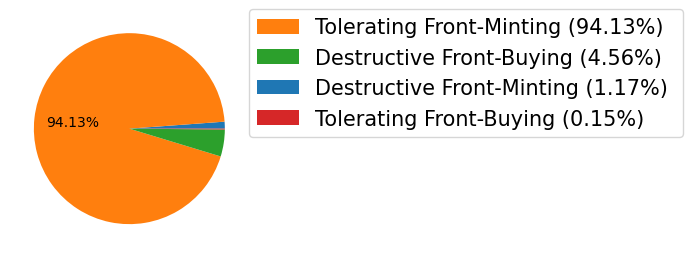

In [7]:
name2count={}
for i in range(len(count)):
    name2count[name[i]]=count[i]
    
keys = list(name2count.keys())
values = np.array(list(name2count.values()))

num1=1
num2=1
num3=2
num4=0

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # 同时显示数值和占比的饼图
        # return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        print(pct)
        if pct<8:
            return ''
        else:
            return '{p:.2f}%'.format(p=pct)
    return my_autopct
patches, texts,_ = plt.pie(values,autopct=make_autopct(values))


# labels = ['{} {:1.2f}% ({})'.format(i, j, v) for i, j, v in
#             zip(keys, 100. * values / values.sum(), values)]  # 构造图例数据
labels = ['{} ({:1.2f}%) '.format(i, j) for i, j in
            zip(keys, 100. * values / values.sum())]  # 构造图例数据

# labels=keys

patches, labels, dummy = zip(*sorted(
    zip(patches, labels, values), key=lambda x: x[2], reverse=True))

# plt.legend(patches[:10], labels[:10], fontsize=10,bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
plt.legend(patches, labels, fontsize=15,bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4,ncol=1)
plt.tight_layout()

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/photo/typeDistribution.pdf",bbox_inches='tight')